<a href="https://colab.research.google.com/github/diegovrosales/SP1_Laboratorios/blob/master/Lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%tensorflow_version 2.x

import tensorflow as tf
import tensorflow_hub as hub

from tensorflow.keras import Sequential
from tensorflow.keras.utils import get_file
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import shutil
import numpy as np
import PIL.Image as Image
import matplotlib.pylab as plt

#dark mode
plt.rc_context({'xtick.color':'w', 'ytick.color':'w', 'text.color':'w', 'axes.labelcolor':'w'})

seed=1234
np.random.seed(seed)
tf.random.set_seed(seed)

In [51]:
!pip install googleimagedownloader
from googleimagedownloader.googleimagedownloader import GoogleImageDownloader

In [0]:
IMAGE_SIZE = (224, 224)

In [0]:
classifier_url ="https://tfhub.dev/google/imagenet/resnet_v2_50/classification/4" 

In [0]:
classifier = Sequential([
    hub.KerasLayer(classifier_url, input_shape=IMAGE_SIZE+(3,))
])

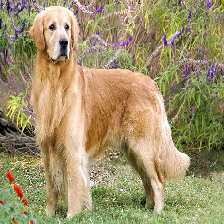

In [32]:
test_image = get_file('img.jpg','https://disenlis.com/wp-content/uploads/2019/01/Golden-Retriever-Standing1.jpg')
test_image = Image.open(test_image).resize(IMAGE_SIZE)
test_image

In [33]:
test_image = np.array(test_image)/255.0
test_image.shape

(224, 224, 3)

In [34]:
result = classifier.predict(test_image[np.newaxis, ...])
result.shape

(1, 1001)

In [35]:
predicted_class = np.argmax(result[0], axis=-1)
predicted_class

208

In [0]:
labels_path = get_file('ImageNetLabels.txt','https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt')
imagenet_labels = np.array(open(labels_path).read().splitlines())

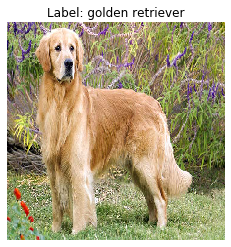

In [37]:
predicted_class_name = imagenet_labels[predicted_class]

plt.axis('off')
plt.title("Label: " + predicted_class_name, color = 'black')
plt.imshow(test_image)
plt.show()

In [0]:
class_names = ['alpaca','dog']
path = 'dataset/'

train_dir = os.path.join(path, 'train')
validation_dir = os.path.join(path, 'validation')

train_ca_dir = os.path.join(train_dir, 'alpaca')  
train_im_dir = os.path.join(train_dir, 'dog')  
validation_ca_dir = os.path.join(validation_dir, 'alpaca') 
validation_im_dir = os.path.join(validation_dir, 'dog')  

if os.path.exists(path):
  shutil.rmtree(path)

os.makedirs(train_ca_dir)
os.makedirs(train_im_dir)
os.makedirs(validation_ca_dir)    
os.makedirs(validation_im_dir)

In [0]:
def manage_images(src, dest_train, dest_val, image_resize=IMAGE_SIZE, val_split=0.1, prefix=''):
  total = len(os.listdir(src))
  val = np.int(total*val_split)
  count = 0
  files = os.listdir(src)

  for file_name in files:
    try:
      dest = dest_train if count >= val else dest_val
      dest_file = os.path.join(dest, prefix + file_name) 

      img = Image.open(os.path.join(src,file_name))
      img.verify()
      # reopen because verify() was called
      # If you need to load the image after using this method, you must reopen the image file.
      # https://pillow.readthedocs.io/en/3.1.x/reference/Image.html
      img = Image.open(os.path.join(src,file_name))
      #resize
      img = img.resize(image_resize, Image.ANTIALIAS)
      #move
      img.save(dest_file)  
      count+=1 
    except Exception as e:
        print('Invalid image: ',file_name,e)
        if os.path.exists(dest_file):
          os.remove(dest_file)
  return


In [0]:
img_dir = os.path.realpath('Images/')

In [56]:
queries = ['peru','animal','angry','face','screaming']
pos = 0
for query in queries:
  image = GoogleImageDownloader(Query='alpaca '+query, numberImage=100)
  try:
    image.downloadImages()
  except Exception as e:
    print('Error ',e)
  #verify, resize, move and split sets
  manage_images(img_dir, train_ca_dir, validation_ca_dir,prefix=str(pos)+'-')
  pos+=1

https://www.google.co.in/search?q=alpaca peru&source=lnms&tbm=isch
Total Time : 0:00:52.820383
Invalid image:  37.jpg cannot write mode RGBA as JPEG
Invalid image:  9.jpg cannot identify image file '/content/Images/9.jpg'
https://www.google.co.in/search?q=alpaca animal&source=lnms&tbm=isch
Total Time : 0:00:00.000345
Invalid image:  37.jpg cannot write mode RGBA as JPEG
Invalid image:  9.jpg cannot identify image file '/content/Images/9.jpg'
https://www.google.co.in/search?q=alpaca angry&source=lnms&tbm=isch
Total Time : 0:00:00.000364
Invalid image:  37.jpg cannot write mode RGBA as JPEG
Invalid image:  9.jpg cannot identify image file '/content/Images/9.jpg'
https://www.google.co.in/search?q=alpaca face&source=lnms&tbm=isch
Total Time : 0:00:00.000335
Invalid image:  37.jpg cannot write mode RGBA as JPEG
Invalid image:  9.jpg cannot identify image file '/content/Images/9.jpg'
https://www.google.co.in/search?q=alpaca screaming&source=lnms&tbm=isch
Total Time : 0:00:00.000382
Invalid i

In [60]:
queries = ['jumping','bark','sleeping','face','funny']
pos = 0
for query in queries:
  image = GoogleImageDownloader(Query='dog '+query, numberImage=100)
  try:
    image.downloadImages()
  except Exception as e:
    print('Error ',e)
  #verify, resize, move and split sets
  manage_images(img_dir, train_im_dir, validation_im_dir,prefix=str(pos)+'-')
  pos+=1

https://www.google.co.in/search?q=dog jumping&source=lnms&tbm=isch
Total Time : 0:00:00.000384
Invalid image:  48.jpg cannot write mode P as JPEG
Invalid image:  59.jpg cannot write mode P as JPEG
Invalid image:  4.jpg cannot identify image file '/content/Images/4.jpg'
Invalid image:  18.jpg cannot identify image file '/content/Images/18.jpg'
Invalid image:  17.jpg cannot write mode RGBA as JPEG
Invalid image:  58.jpg cannot identify image file '/content/Images/58.jpg'
Invalid image:  14.jpg cannot write mode P as JPEG
Invalid image:  3.jpg cannot write mode RGBA as JPEG
Invalid image:  57.jpg cannot identify image file '/content/Images/57.jpg'
Invalid image:  35.jpg cannot identify image file '/content/Images/35.jpg'
Invalid image:  54.jpg cannot write mode RGBA as JPEG
Invalid image:  68.jpg cannot write mode P as JPEG
Invalid image:  19.jpg cannot write mode P as JPEG
https://www.google.co.in/search?q=dog bark&source=lnms&tbm=isch
Total Time : 0:00:00.000343
Invalid image:  48.jpg c

In [61]:
total_train = len(os.listdir(train_ca_dir))+ len(os.listdir(train_im_dir))
total_val = len(os.listdir(validation_ca_dir))+ len(os.listdir(validation_im_dir))

print('total training Captain America images:', len(os.listdir(train_ca_dir)))
print('total training Iron Man images:', len(os.listdir(train_im_dir)))

print('total validation Captain America images:', len(os.listdir(validation_ca_dir)))
print('total validation Iron Man images:', len(os.listdir(validation_im_dir)))
print("--")
print("Total training images:", total_train)
print("Total validation images:", total_val)

total training Captain America images: 350
total training Iron Man images: 296
total validation Captain America images: 35
total validation Iron Man images: 40
--
Total training images: 646
Total validation images: 75


In [0]:
train_image_generator = ImageDataGenerator(rescale=1./255)
validation_image_generator = ImageDataGenerator(rescale=1./255)

In [63]:
train_data_gen = train_image_generator.flow_from_directory(train_dir,
                                                           shuffle=True,
                                                           batch_size=32,
                                                           target_size=IMAGE_SIZE,
                                                           class_mode='binary')

Found 646 images belonging to 2 classes.


In [64]:
val_data_gen = validation_image_generator.flow_from_directory(validation_dir,
                                                              target_size=IMAGE_SIZE,
                                                              class_mode='binary')

Found 75 images belonging to 2 classes.


In [0]:
image_batch, labels_batch = next(train_data_gen)

In [66]:
result_batch = classifier.predict(image_batch)
result_batch.shape

(32, 1001)

In [67]:
predicted_class_names = imagenet_labels[np.argmax(result_batch, axis=-1)]
predicted_class_names

array(['Arabian camel', 'Irish wolfhound', 'llama', 'reflex camera',
       'Chihuahua', 'llama', 'German shepherd', 'bighorn', 'Chihuahua',
       'llama', 'American Staffordshire terrier', 'vizsla', 'llama',
       'Walker hound', 'mouse', 'Chihuahua', 'hare', 'barrow',
       'German shepherd', 'llama', 'EntleBucher', 'llama', 'comic book',
       'king penguin', 'hare', 'llama', 'llama', 'whippet', 'Chihuahua',
       'Blenheim spaniel', 'Italian greyhound',
       'German short-haired pointer'], dtype='<U30')

In [0]:
def plot_images(img_batch, labels, predicted_labels):
  plt.figure(figsize=(12,12))
  plt.subplots_adjust(hspace=0.5)
  for i in range(15):
    plt.subplot(6,5,i+1) 
    plt.imshow(img_batch[i])
    color = "green" if predicted_labels[i] == class_names[np.int(labels[i])] else "red"
    plt.title(predicted_labels[i], color=color)
    plt.axis('off')

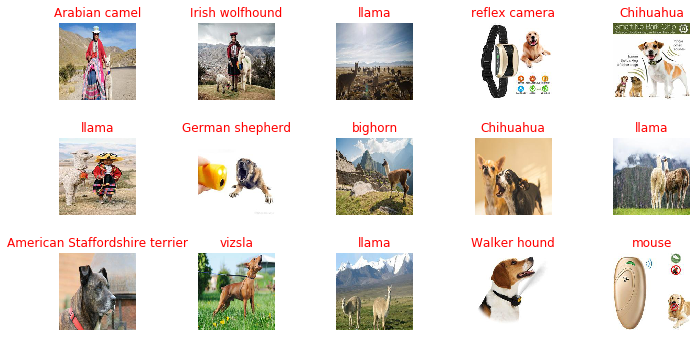

In [69]:
plot_images(image_batch, labels_batch, predicted_class_names)

In [0]:
feature_extractor_url = "https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/4"

In [0]:
feature_extractor_layer = hub.KerasLayer(feature_extractor_url,
                                         input_shape=IMAGE_SIZE+(3,))

In [72]:
feature_batch = feature_extractor_layer(image_batch)
print(feature_batch.shape)

(32, 2048)


In [0]:
feature_extractor_layer.trainable = False

In [74]:
model = Sequential([
  feature_extractor_layer,
  Dense(1024, activation='relu'),
  Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_2 (KerasLayer)   (None, 2048)              23564800  
_________________________________________________________________
dense (Dense)                (None, 1024)              2098176   
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 1025      
Total params: 25,664,001
Trainable params: 2,099,201
Non-trainable params: 23,564,800
_________________________________________________________________


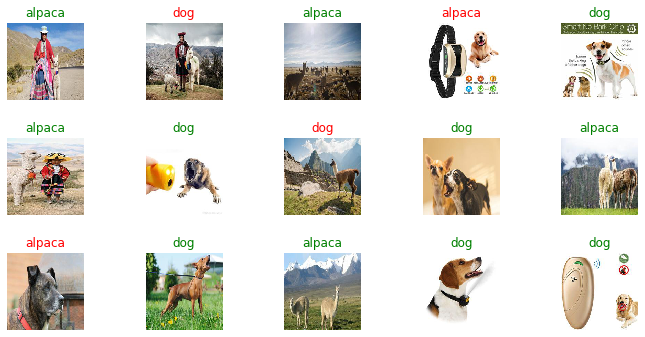

In [75]:
predictions = model(image_batch)
predicted_class_names = np.array(class_names)[np.rint(predictions).astype('int32')].flatten()
plot_images(image_batch, labels_batch, predicted_class_names)

In [0]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [77]:
history = model.fit(
    train_data_gen,
    epochs=5,
    steps_per_epoch=5,
    validation_data=val_data_gen
)

  ...
    to  
  ['...']


  ...
    to  
  ['...']


  ...
    to  
  ['...']


  ...
    to  
  ['...']


Train for 5 steps, validate for 3 steps
Epoch 1/5
5/5 [==============================] - 35s 7s/step - loss: 0.1853 - accuracy: 0.9062 - val_loss: 0.4444 - val_accuracy: 0.8000
Epoch 2/5
5/5 [==============================] - 31s 6s/step - loss: 0.0131 - accuracy: 0.9937 - val_loss: 2.8080e-04 - val_accuracy: 1.0000
Epoch 3/5
5/5 [==============================] - 31s 6s/step - loss: 0.0337 - accuracy: 0.9875 - val_loss: 3.0345e-05 - val_accuracy: 1.0000
Epoch 4/5
5/5 [==============================] - 28s 6s/step - loss: 0.0116 - accuracy: 0.9925 - val_loss: 0.0014 - val_accuracy: 1.0000
Epoch 5/5
5/5 [==============================] - 31s 6s/step - loss: 4.0942e-05 - accuracy: 1.0000 - val_loss: 5.1713e-04 - val_accuracy: 1.0000


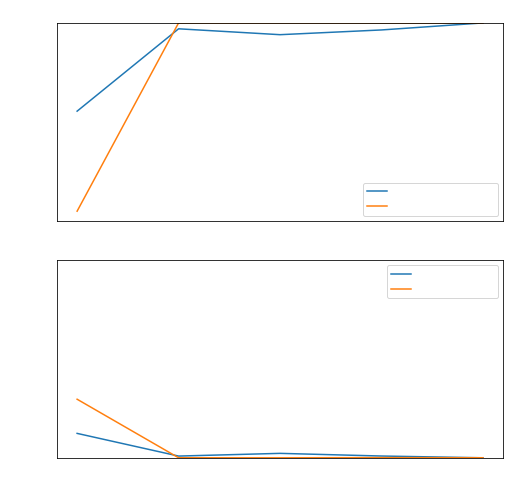

In [78]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.5])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

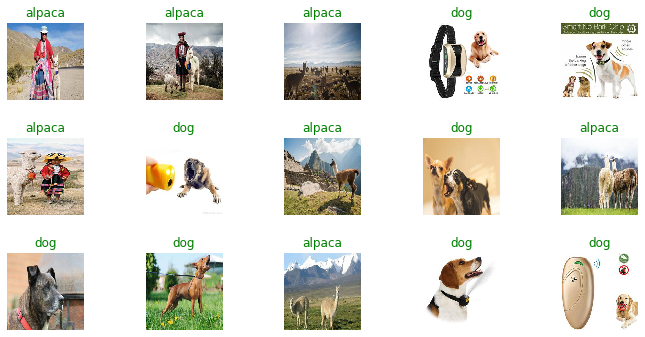

In [79]:
predictions = model(image_batch)
predicted_class_names = np.array(class_names)[np.rint(predictions).astype('int32')].flatten()

plot_images(image_batch, labels_batch, predicted_class_names)